# Importing Libraries

In [2]:
!pip install xgboost
!pip install graphviz
!pip install folium
!pip install seaborn
!pip install statsmodels

mkl-random 1.0.1 requires cython, which is not installed.
You are using pip version 10.0.1, however version 21.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


mkl-random 1.0.1 requires cython, which is not installed.
You are using pip version 10.0.1, however version 21.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


mkl-random 1.0.1 requires cython, which is not installed.
You are using pip version 10.0.1, however version 21.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


mkl-random 1.0.1 requires cython, which is not installed.
You are using pip version 10.0.1, however version 21.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


mkl-random 1.0.1 requires cython, which is not installed.
You are using pip version 10.0.1, however version 21.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
from sklearn.linear_model import LinearRegression,LogisticRegression
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
from scipy.stats import boxcox
from scipy import stats
from scipy.stats import norm
import pylab 

from sklearn.ensemble import RandomForestRegressor 
import xgboost as xgb
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

C:\Users\rkuma\anaconda3\envs\python-cvcourse\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# Importing the csv File

In [4]:
AirBnB = pd.read_csv( r"C:/Users/rkuma/OneDrive/Desktop/AR/AB_NYC_2019.csv")
AirBnB.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

# Exploratory Data Analysis

## Data Types

In [5]:
AirBnB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## Missing Values

In [6]:
def missing_values(x):
        mis_val = x.isnull().sum()
        mis_val_percent = 100 * x.isnull().sum() / len(x)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        return mis_val_table

In [7]:
missing_values(AirBnB)

Missing Values  % of Total Values
id                                           0           0.000000
name                                        16           0.032723
host_id                                      0           0.000000
host_name                                   21           0.042949
neighbourhood_group                          0           0.000000
neighbourhood                                0           0.000000
latitude                                     0           0.000000
longitude                                    0           0.000000
room_type                                    0           0.000000
price                                        0           0.000000
minimum_nights                               0           0.000000
number_of_reviews                            0           0.000000
last_review                              10052          20.558339
reviews_per_month                        10052          20.558339
calculated_host_listings_count               0           0.000000
availability_365                             0           0.000000

In [8]:
AirBnB.reviews_per_month.fillna(0,inplace=True)

In [9]:
AirBnB.id.nunique()

48895

In [10]:
AirBnB.shape

(48895, 16)

## Frequency counts of the data

In [11]:
AirBnB.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

**Brooklyn and Manhattan have the highest demand , have most of the properties and also are costlier then others.**

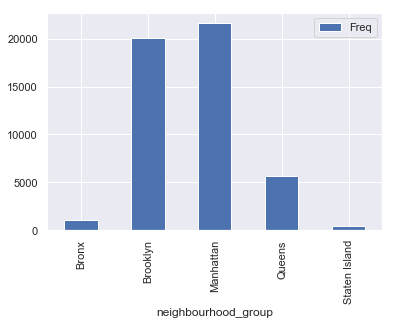

In [12]:
Area=AirBnB.groupby(["neighbourhood_group"]).size().reset_index(name="Freq")
Area.plot.bar(x="neighbourhood_group",y="Freq")

In [13]:
AirBnB.neighbourhood.value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Woodrow                  1
New Dorp                 1
Rossville                1
Richmondtown             1
Name: neighbourhood, Length: 221, dtype: int64

In [14]:
AirBnB.groupby(["neighbourhood_group"]).mean()

id       host_id   latitude  longitude  \
neighbourhood_group                                                     
Bronx                2.273492e+07  1.056099e+08  40.848305 -73.884552   
Brooklyn             1.825685e+07  5.671526e+07  40.685036 -73.951190   
Manhattan            1.877494e+07  6.783062e+07  40.765062 -73.974607   
Queens               2.175500e+07  9.615680e+07  40.731531 -73.872775   
Staten Island        2.159747e+07  9.853360e+07  40.610225 -74.105805   

                          price  minimum_nights  number_of_reviews  \
neighbourhood_group                                                  
Bronx                 87.496792        4.560953          26.004583   
Brooklyn             124.383207        6.056556          24.202845   
Manhattan            196.875814        8.579151          20.985596   
Queens                99.517649        5.181433          27.700318   
Staten Island        114.812332        4.831099          30.941019   

                     reviews_per_month  calculated_host_listings_count  \
neighbourhood_group                                                      
Bronx                         1.475655                        2.233731   
Brooklyn                      1.049790                        2.284371   
Manhattan                     0.976782                       12.791330   
Queens                        1.567076                        4.060184   
Staten Island                 1.576381                        2.319035   

                     availability_365  
neighbourhood_group                    
Bronx                      165.758937  
Brooklyn                   100.232292  
Manhattan                  111.979410  
Queens                     144.451818  
Staten Island              199.678284

In [15]:
AirBnB.room_type.value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [16]:
Room_type=AirBnB.groupby(["room_type"])

In [17]:
Room_type.first()

id                                 name  host_id  \
room_type                                                              
Entire home/apt   2595                Skylit Midtown Castle     2845   
Private room      2539   Clean & quiet apt home by the park     2787   
Shared room      12048  LowerEastSide apt share shortterm 1     7549   

                host_name neighbourhood_group    neighbourhood  latitude  \
room_type                                                                  
Entire home/apt  Jennifer           Manhattan          Midtown  40.75362   
Private room         John            Brooklyn       Kensington  40.64749   
Shared room           Ben           Manhattan  Lower East Side  40.71401   

                 longitude  price  minimum_nights  number_of_reviews  \
room_type                                                              
Entire home/apt  -73.98377    225               1                 45   
Private room     -73.97237    149               1                  9   
Shared room      -73.98917     40               1                214   

                last_review  reviews_per_month  \
room_type                                        
Entire home/apt  2019-05-21               0.38   
Private room     2018-10-19               0.21   
Shared room      2019-07-05               1.81   

                 calculated_host_listings_count  availability_365  
room_type                                                          
Entire home/apt                               2               355  
Private room                                  6               365  
Shared room                                   4               188

In [18]:
EH_Apt=Room_type.get_group('Entire home/apt')

In [19]:
PR=Room_type.get_group('Private room')

In [20]:
SR=Room_type.get_group('Shared room')

In [21]:
EH_Apt.head()

id                                              name  host_id  \
1  2595                             Skylit Midtown Castle     2845   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   
5  5099         Large Cozy 1 BR Apartment In Midtown East     7322   
9  5238                Cute & Cozy Lower East Side 1 bdrm     7549   

     host_name neighbourhood_group neighbourhood  latitude  longitude  price  \
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377    225   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976     89   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399     80   
5        Chris           Manhattan   Murray Hill  40.74767  -73.97500    200   
9          Ben           Manhattan     Chinatown  40.71344  -73.99037    150   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
1               1                 45  2019-05-21               0.38   
3               1                270  2019-07-05               4.64   
4              10                  9  2018-11-19               0.10   
5               3                 74  2019-06-22               0.59   
9               1                160  2019-06-09               1.33   

   calculated_host_listings_count  availability_365  
1                               2               355  
3                               1               194  
4                               1                 0  
5                               1               129  
9                               4               188

In [22]:
EH_Apt[["price","availability_365","number_of_reviews"]].mean()

price                211.794246
availability_365     111.920304
number_of_reviews     22.842418
dtype: float64

In [23]:
PR[["price","availability_365","number_of_reviews"]].mean()

price                 89.780973
availability_365     111.203933
number_of_reviews     24.112962
dtype: float64

In [24]:
SR[["price","availability_365","number_of_reviews"]].mean()

price                 70.127586
availability_365     162.000862
number_of_reviews     16.600000
dtype: float64

In [25]:
SR["neighbourhood_group"].value_counts()

Manhattan        480
Brooklyn         413
Queens           198
Bronx             60
Staten Island      9
Name: neighbourhood_group, dtype: int64

In [26]:
AirBnB.groupby(["neighbourhood_group","room_type"]).size().reset_index(name="Freq")

neighbourhood_group        room_type   Freq
0                Bronx  Entire home/apt    379
1                Bronx     Private room    652
2                Bronx      Shared room     60
3             Brooklyn  Entire home/apt   9559
4             Brooklyn     Private room  10132
5             Brooklyn      Shared room    413
6            Manhattan  Entire home/apt  13199
7            Manhattan     Private room   7982
8            Manhattan      Shared room    480
9               Queens  Entire home/apt   2096
10              Queens     Private room   3372
11              Queens      Shared room    198
12       Staten Island  Entire home/apt    176
13       Staten Island     Private room    188
14       Staten Island      Shared room      9

In [27]:
AirBnB.groupby(["neighbourhood_group"]).mean().reset_index()

neighbourhood_group            id       host_id   latitude  longitude  \
0               Bronx  2.273492e+07  1.056099e+08  40.848305 -73.884552   
1            Brooklyn  1.825685e+07  5.671526e+07  40.685036 -73.951190   
2           Manhattan  1.877494e+07  6.783062e+07  40.765062 -73.974607   
3              Queens  2.175500e+07  9.615680e+07  40.731531 -73.872775   
4       Staten Island  2.159747e+07  9.853360e+07  40.610225 -74.105805   

        price  minimum_nights  number_of_reviews  reviews_per_month  \
0   87.496792        4.560953          26.004583           1.475655   
1  124.383207        6.056556          24.202845           1.049790   
2  196.875814        8.579151          20.985596           0.976782   
3   99.517649        5.181433          27.700318           1.567076   
4  114.812332        4.831099          30.941019           1.576381   

   calculated_host_listings_count  availability_365  
0                        2.233731        165.758937  
1                        2.284371        100.232292  
2                       12.791330        111.979410  
3                        4.060184        144.451818  
4                        2.319035        199.678284

In [28]:
Unique_host=AirBnB.drop_duplicates(['host_id'])

In [29]:
Unique_host.sort_values(by=["calculated_host_listings_count"], ascending=False).head()

id                                               name    host_id  \
38293  30181691      Sonder | 180 Water | Incredible 2BR + Rooftop  219517861   
26137  20845031  Homey Midtown East 1BR w/ Gym, Doorman, near t...  107434423   
9740    7491713       NYC Lavish Studio Apartment Steps from SoHo!   30283594   
32718  25779464              Lovely Room in the Heart of Manhattan  137358866   
5093    3662724                 5144-Prime Doorman!78ST & Madison    16098958   

            host_name neighbourhood_group       neighbourhood  latitude  \
38293    Sonder (NYC)           Manhattan  Financial District  40.70637   
26137      Blueground           Manhattan            Kips Bay  40.74510   
9740             Kara           Manhattan  Financial District  40.70862   
32718          Kazuya           Manhattan              Harlem  40.81118   
5093   Jeremy & Laura           Manhattan     Upper East Side  40.77448   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
38293  -74.00645  Entire home/apt    302              29                  0   
26137  -73.97915  Entire home/apt    308              30                  0   
9740   -74.01408  Entire home/apt    169              30                  3   
32718  -73.94231     Private room     56              30                  4   
5093   -73.96102  Entire home/apt    175              30                  2   

      last_review  reviews_per_month  calculated_host_listings_count  \
38293         NaN               0.00                             327   
26137         NaN               0.00                             232   
9740   2018-12-07               0.09                             121   
32718  2019-04-06               0.37                             103   
5093   2019-05-30               0.06                              96   

       availability_365  
38293               309  
26137               156  
9740                364  
32718               244  
5093                281

## Correlation map

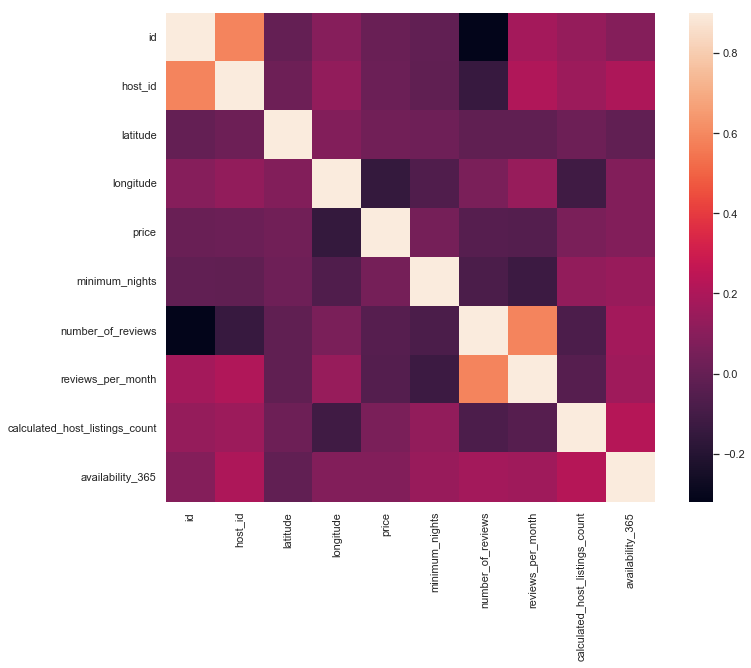

In [30]:
corr_matrix = AirBnB.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr_matrix, vmax=0.9, square=True)

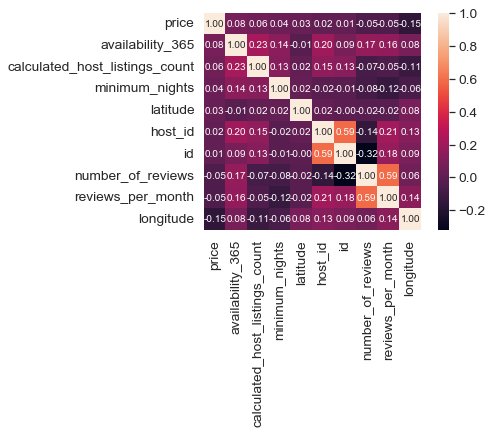

In [31]:
k = 10 #number of variables for heatmap
cols = corr_matrix.nlargest(k, 'price')['price'].index
cm = np.corrcoef(AirBnB[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [32]:
NG=AirBnB.groupby(["neighbourhood_group"])

In [33]:
NG.first()

id                                               name  \
neighbourhood_group                                                             
Bronx                44096                                   Room with a View   
Brooklyn              2539                 Clean & quiet apt home by the park   
Manhattan             2595                              Skylit Midtown Castle   
Queens               12937  1 Stop fr. Manhattan! Private Suite,Landmark B...   
Staten Island        42882                          New York room with a view   

                     host_id             host_name     neighbourhood  \
neighbourhood_group                                                    
Bronx                 190409              Waundell        Highbridge   
Brooklyn                2787                  John        Kensington   
Manhattan               2845              Jennifer           Midtown   
Queens                 50124               Orestes  Long Island City   
Staten Island         185978  Newyorkroomwithaview        St. George   

                     latitude  longitude        room_type  price  \
neighbourhood_group                                                
Bronx                40.83232  -73.93184     Private room     40   
Brooklyn             40.64749  -73.97237     Private room    149   
Manhattan            40.75362  -73.98377  Entire home/apt    225   
Queens               40.74771  -73.94740     Private room    130   
Staten Island        40.64524  -74.08088     Private room     70   

                     minimum_nights  number_of_reviews last_review  \
neighbourhood_group                                                  
Bronx                             1                219  2019-07-04   
Brooklyn                          1                  9  2018-10-19   
Manhattan                         1                 45  2019-05-21   
Queens                            3                248  2019-07-01   
Staten Island                     2                166  2019-06-13   

                     reviews_per_month  calculated_host_listings_count  \
neighbourhood_group                                                      
Bronx                             2.04                               3   
Brooklyn                          0.21                               6   
Manhattan                         0.38                               2   
Queens                            2.25                               1   
Staten Island                     1.66                               1   

                     availability_365  
neighbourhood_group                    
Bronx                             353  
Brooklyn                          365  
Manhattan                         355  
Queens                            215  
Staten Island                     312

In [34]:
Bronx=NG.get_group('Bronx')

In [35]:
Bronx.head()

id                                              name  host_id  \
171  44096                                  Room with a View   190409   
207  54626                    Cozy bedroom by Yankee Stadium   190409   
260  63588                                               LL3   295128   
261  63610  DOMINIQUE'S NY mini efficiency* wifi*metro*quiet   310670   
309  71812              Condo Apartment with laundry in unit   369015   

        host_name neighbourhood  latitude  longitude        room_type  price  \
171      Waundell    Highbridge  40.83232  -73.93184     Private room     40   
207      Waundell    Highbridge  40.83075  -73.93058     Private room     45   
260  Carol Gloria  Clason Point  40.81309  -73.85514     Private room     90   
261           Vie   Eastchester  40.88057  -73.83572  Entire home/apt    105   
309          Thai   Kingsbridge  40.87207  -73.90193  Entire home/apt     90   

     minimum_nights  number_of_reviews last_review  reviews_per_month  \
171               1                219  2019-07-04               2.04   
207               1                138  2019-06-30               1.45   
260               2                  0         NaN               0.00   
261               2                 38  2019-06-27               0.50   
309              30                  4  2019-01-02               0.35   

     calculated_host_listings_count  availability_365  
171                               3               353  
207                               3               323  
260                               7               349  
261                              13               365  
309                               2               346

In [36]:
Bronx.groupby(["neighbourhood","room_type"]).mean()

id       host_id   latitude  \
neighbourhood  room_type                                                
Allerton       Entire home/apt  2.177165e+07  9.900126e+07  40.865760   
               Private room     1.903460e+07  1.090219e+08  40.865003   
Baychester     Entire home/apt  2.089410e+07  1.203282e+08  40.871170   
               Private room     2.310184e+07  1.532322e+08  40.875450   
Belmont        Entire home/apt  2.776553e+07  1.618895e+08  40.853237   
...                                      ...           ...        ...   
Williamsbridge Entire home/apt  2.469249e+07  1.115562e+08  40.877892   
               Private room     2.123021e+07  1.086725e+08  40.879879   
Woodlawn       Entire home/apt  2.019757e+07  1.018849e+08  40.899763   
               Private room     2.339996e+07  7.297837e+07  40.895788   
               Shared room      1.968202e+07  1.053754e+08  40.897850   

                                longitude       price  minimum_nights  \
neighbourhood  room_type                                                
Allerton       Entire home/apt -73.859012  123.062500        2.250000   
               Private room    -73.858552   65.769231        2.192308   
Baychester     Entire home/apt -73.842353   90.333333        3.000000   
               Private room    -73.843427   64.250000        2.000000   
Belmont        Entire home/apt -73.892070  228.666667        1.666667   
...                                   ...         ...             ...   
Williamsbridge Entire home/apt -73.859537  148.315789        5.052632   
               Private room    -73.856889   50.095238        6.619048   
Woodlawn       Entire home/apt -73.867352   65.500000        1.500000   
               Private room    -73.868025   54.833333        1.333333   
               Shared room     -73.869770   70.000000        2.000000   

                                number_of_reviews  reviews_per_month  \
neighbourhood  room_type                                               
Allerton       Entire home/apt          54.000000           2.198750   
               Private room             36.115385           1.256923   
Baychester     Entire home/apt          95.333333           3.686667   
               Private room              6.000000           0.545000   
Belmont        Entire home/apt          32.000000           2.713333   
...                                           ...                ...   
Williamsbridge Entire home/apt          42.368421           2.774737   
               Private room             15.857143           0.935238   
Woodlawn       Entire home/apt          64.750000           2.507500   
               Private room             37.166667           2.663333   
               Shared room               2.000000           0.110000   

                                calculated_host_listings_count  \
neighbourhood  room_type                                         
Allerton       Entire home/apt                        2.437500   
               Private room                           2.961538   
Baychester     Entire home/apt                        1.666667   
               Private room                           1.750000   
Belmont        Entire home/apt                        2.333333   
...                                                        ...   
Williamsbridge Entire home/apt                        2.000000   
               Private room                           2.380952   
Woodlawn       Entire home/apt                        1.000000   
               Private room                           2.166667   
               Shared room                            2.000000   

                                availability_365  
neighbourhood  room_type                          
Allerton       Entire home/apt        193.937500  
               Private room           145.038462  
Baychester     Entire home/apt        103.000000  
               Private room           199.000000  
Belmont        Entire home/apt        31

In [37]:
Bronx[(Bronx["neighbourhood"]=="Belmont") & (Bronx["room_type"]=="Entire home/apt")]

id                                               name    host_id  \
26290  20960110  Arthur Ave 2BDR sleeps 6! (15 mins from Manhat...   98416305   
39810  30948241     Book NOW this New 3br Home with lots of space.  193626078   
40489  31388229  Book TODAY! Large 3br with lots of space in th...  193626078   

      host_name neighbourhood  latitude  longitude        room_type  price  \
26290     Nihad       Belmont  40.85362  -73.88960  Entire home/apt    140   
39810      Andy       Belmont  40.85222  -73.89277  Entire home/apt    299   
40489      Andy       Belmont  40.85387  -73.89384  Entire home/apt    247   

       minimum_nights  number_of_reviews last_review  reviews_per_month  \
26290               2                 71  2019-06-23               3.45   
39810               1                 10  2019-06-28               1.52   
40489               2                 15  2019-06-30               3.17   

       calculated_host_listings_count  availability_365  
26290                               1               291  
39810                               3               322  
40489                               3               322

In [38]:
from scipy.stats import spearmanr
corr, _ = spearmanr(AirBnB['price'], AirBnB['availability_365'])
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.086


In [39]:
from scipy.stats import kendalltau
coef, p= spearmanr(AirBnB['price'], AirBnB['availability_365'])
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)

Kendall correlation coefficient: 0.086
Samples are correlated (reject H0) p=0.000


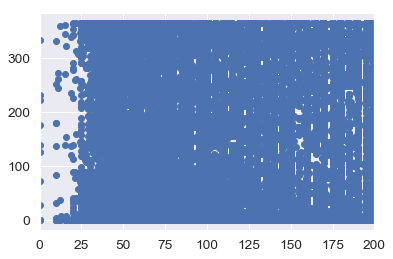

In [40]:
plt.xlim([0, 200])
plt.scatter(AirBnB['price'],AirBnB['availability_365'])

**Preparing the data to build a regression model. Response variable is price.**

In [41]:
AirBnB_MD=AirBnB[["price","number_of_reviews","neighbourhood_group","room_type","availability_365","calculated_host_listings_count","minimum_nights"]]

In [42]:
AirBnB_MD.head()

price  number_of_reviews neighbourhood_group        room_type  \
0    149                  9            Brooklyn     Private room   
1    225                 45           Manhattan  Entire home/apt   
2    150                  0           Manhattan     Private room   
3     89                270            Brooklyn  Entire home/apt   
4     80                  9           Manhattan  Entire home/apt   

   availability_365  calculated_host_listings_count  minimum_nights  
0               365                               6               1  
1               355                               2               1  
2               365                               1               3  
3               194                               1               1  
4                 0                               1              10

In [43]:
pred=AirBnB_MD[["price"]]

In [44]:
pred.head()

price
0    149
1    225
2    150
3     89
4     80

In [45]:
AirBnB_MD.columns

Index(['price', 'number_of_reviews', 'neighbourhood_group', 'room_type',
       'availability_365', 'calculated_host_listings_count', 'minimum_nights'],
      dtype='object')

In [46]:
AirBnB_MD.head()

price  number_of_reviews neighbourhood_group        room_type  \
0    149                  9            Brooklyn     Private room   
1    225                 45           Manhattan  Entire home/apt   
2    150                  0           Manhattan     Private room   
3     89                270            Brooklyn  Entire home/apt   
4     80                  9           Manhattan  Entire home/apt   

   availability_365  calculated_host_listings_count  minimum_nights  
0               365                               6               1  
1               355                               2               1  
2               365                               1               3  
3               194                               1               1  
4                 0                               1              10

In [47]:
AirBnB_MD = pd.get_dummies(AirBnB_MD, columns=['neighbourhood_group','room_type'])

In [48]:
#without log transformation
AirBnB_y = AirBnB_MD.iloc[:, 0]

In [49]:
AirBnB_x=AirBnB_MD.iloc[:,1:]

In [50]:
AirBnB_x.head()

number_of_reviews  availability_365  calculated_host_listings_count  \
0                  9               365                               6   
1                 45               355                               2   
2                  0               365                               1   
3                270               194                               1   
4                  9                 0                               1   

   minimum_nights  neighbourhood_group_Bronx  neighbourhood_group_Brooklyn  \
0               1                          0                             1   
1               1                          0                             0   
2               3                          0                             0   
3               1                          0                             1   
4              10                          0                             0   

   neighbourhood_group_Manhattan  neighbourhood_group_Queens  \
0                              0                           0   
1                              1                           0   
2                              1                           0   
3                              0                           0   
4                              1                           0   

   neighbourhood_group_Staten Island  room_type_Entire home/apt  \
0                                  0                          0   
1                                  0                          1   
2                                  0                          0   
3                                  0                          1   
4                                  0                          1   

   room_type_Private room  room_type_Shared room  
0                       1                      0  
1                       0                      0  
2                       1                      0  
3                       0                      0  
4                       0                      0

In [51]:
AirBnB_y.head()

0    149
1    225
2    150
3     89
4     80
Name: price, dtype: int64

In [52]:
xTrain, xTest, yTrain, yTest = train_test_split(AirBnB_x, pred, test_size = 0.2, random_state = 123)

In [53]:
xTrain.shape

(39116, 12)

In [54]:
xTest.shape

(9779, 12)

In [55]:
yTrain[yTrain['price']<200].shape

(31305, 1)

**Outliers in the response variable**

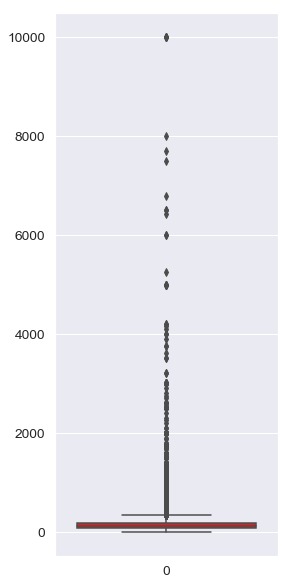

In [56]:
plt.figure(figsize=(4,10))
sns.boxplot(
    data=yTrain['price'],
    color='red')

Text(0.5,1,'Distribution of Price')

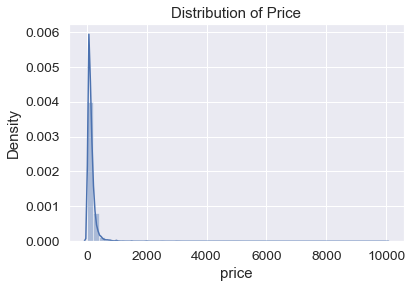

In [57]:
sns.distplot(pred['price']).set_title("Distribution of Price")

In [58]:
from scipy.stats import anderson 
p=anderson((pred['price']))

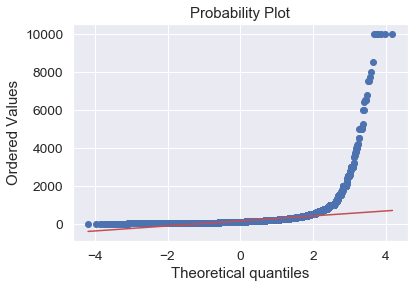

In [59]:
import scipy.stats as stats
fig = plt.figure()
res = stats.probplot((pred['price']), plot=plt)

**Response variable is extremely right skewed : Will do log transformation to deal with the same** 

In [60]:
from scipy.stats import norm


 mean = 4.74 and std dev = 0.70



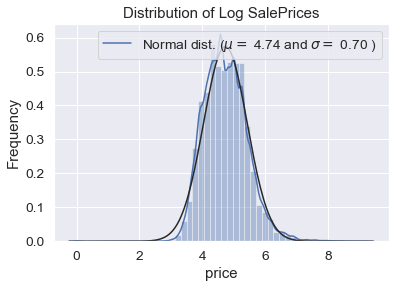

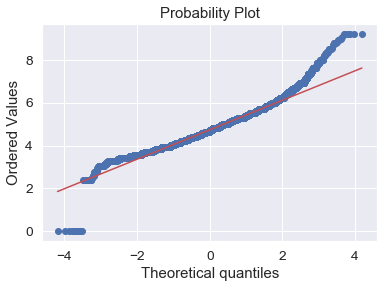

In [61]:
#Using the log1p function applies log(1+x) to all elements of the column
pred['price'] = np.log1p(pred['price'])

#Check the new distribution after log transformation 
sns.distplot(pred['price'], fit=norm) 

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(pred['price'])
print( '\n mean = {:.2f} and std dev = {:.2f}\n'.format(mu, sigma))

#NPlotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Distribution of Log SalePrices')

#Also the QQ plot
fig = plt.figure()
res = stats.probplot(pred['price'], plot=plt)
plt.show()

In [62]:
pred.head()

price
0  5.010635
1  5.420535
2  5.017280
3  4.499810
4  4.394449

**Using XGBoost** 

In [63]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [64]:
data_dmatrix = xgb.DMatrix(data=AirBnB_x,label=pred)

In [65]:
xTrain, xTest, yTrain, yTest = train_test_split(AirBnB_x, pred, test_size = 0.2, random_state = 123)

**<u>Hyperparameters</u>**:                        
* **Objective:** It determines the loss function to be used. In this case it is regression
* **Learning_rate:** Step size shrinkage used to prevent overfitting. Range is [0,1]
* **Max_depth:** Depth of the tree 
* **Random_state:** Provided seed to get the same result everytime

In [66]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', learning_rate = 0.2,
                max_depth = 4,random_state=123)

In [67]:
xg_reg.fit(xTrain,yTrain)

[09:26:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
       gamma=0, gpu_id=-1, importance_type=None,
       interaction_constraints='', learning_rate=0.2, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=nan,
       monotone_constraints='()', n_estimators=100, n_jobs=8,
       num_parallel_tree=1, objective='reg:linear', predictor='auto',
       random_state=123, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       subsample=1, tree_method='exact', validate_parameters=1,
       verbosity=None)

In [68]:
preds = xg_reg.predict(xTest)
preds_exp = pd.DataFrame(np.exp(preds))

yTest_exp = pd.DataFrame(np.exp(yTest))

In [69]:
rmse = np.sqrt(mean_squared_error(yTest, preds))
print("RMSE: %f" % (rmse))

rmse_exp = np.sqrt(mean_squared_error(yTest_exp, preds_exp))
print("RMSE: %f" % (rmse_exp))

RMSE: 0.480414
RMSE: 234.362126


**Since, the RMSE is too large we cannot use this model.**

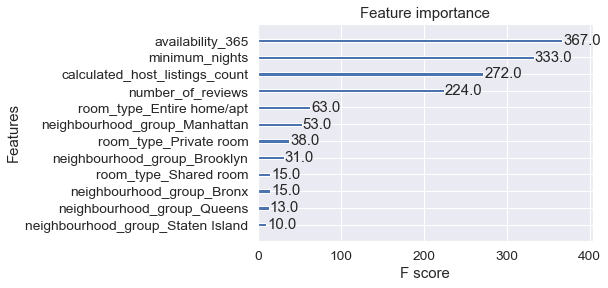

In [70]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

# Visualizations

In [71]:
import folium
from folium import plugins
from folium.plugins import HeatMap


map_hooray = folium.Map(location=[40.7128 ,-74.0060],
                    zoom_start = 10) 

# Ensure you're handing it floats
AirBnB['latitude'] = AirBnB['latitude'].astype(float)
AirBnB['longitude'] = AirBnB['longitude'].astype(float)


heat_df = AirBnB[['latitude', 'longitude']]

# List comprehension to make out list of lists
heat_data = [[row['latitude'],row['longitude']] for index, row in heat_df.iterrows()]

# Plot it on the map
HeatMap(heat_data).add_to(map_hooray)

# Display the map
map_hooray


In [72]:
def generateBaseMap(default_location=[40.7128 ,-74.0060], default_zoom_start=10):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

from folium.plugins import HeatMap
AirBnB['count'] = 1
base_map = generateBaseMap()
HeatMap(data=AirBnB[['latitude', 'longitude', 'count']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)

base_map

# Checking distributions of the variables

In [73]:
AirBnB[AirBnB['minimum_nights']>100]

id                                               name    host_id  \
61        15396                 Sunny & Spacious Chelsea Apartment      60278   
245       61509                Quiet, clean midtown apt w. elevato      23619   
667      253332      Spacious, modern loft in awesome neighborhood     552343   
700      258690                CHELSEA 1 Bdrm Plus Sleeping Loft!!    1359611   
719      263502                  Prime Williamsburg 1/BD New Condo    1382749   
...         ...                                                ...        ...   
47620  35834935                             Williamsburg Apartment   82674375   
47745  35892874  3 Bedroom Loft Like Triplex 2.5 Bath with Garden.  269970642   
48043  36056808       Luxury TriBeCa Apartment at an amazing price  271248669   
48205  36138789            Room with Amazing location in Manhattan   31846499   
48446  36270376     Beautiful home on Staten Island, walk to ferry     444904   

        host_name neighbourhood_group neighbourhood  latitude  longitude  \
61          Petra           Manhattan       Chelsea  40.74623  -73.99530   
245    Anna/Fonzy           Manhattan       Midtown  40.75749  -73.96897   
667       Cynthia            Brooklyn   Sunset Park  40.66230  -73.99049   
700        Andrea           Manhattan       Chelsea  40.74618  -74.00392   
719         Shaun            Brooklyn  Williamsburg  40.72059  -73.95670   
...           ...                 ...           ...       ...        ...   
47620         Meg            Brooklyn  Williamsburg  40.70898  -73.94885   
47745        Rita           Manhattan        Harlem  40.80778  -73.94762   
48043       Jenny           Manhattan       Tribeca  40.71206  -74.00999   
48205    Veronika           Manhattan   East Harlem  40.78774  -73.94627   
48446      Janine       Staten Island    St. George  40.64005  -74.07987   

             room_type  price  minimum_nights  number_of_reviews last_review  \
61     Entire home/apt    375             180                  5  2018-11-03   
245    Entire home/apt    110             200                 92  2019-04-30   
667    Entire home/apt     96             120                 13  2018-09-01   
700    Entire home/apt    195             365                 10  2014-10-26   
719    Entire home/apt    185             180                 24  2015-08-19   
...                ...    ...             ...                ...         ...   
47620  Entire home/apt    140             500                  0         NaN   
47745  Entire home/apt    200             120                  0         NaN   
48043  Entire home/apt   6500             180                  0         NaN   
48205     Private room     73             180                  0         NaN   
48446  Entire home/apt    100             365                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  \
61                  0.12                               1               180   
245                 0.90                               1               140   
667                 0.14                               1               204   
700                 0.12                               1                 0   
719                 0.26                               1                 0   
...                  ...                             ...               ...   
47620               0.00                               1               331   
47745               0.00                               1               365   
48043               0.00                               1               365   
48205               0.00                               1                 0   
48446               0.00                               1               342   

       count  
61         1  
245        1  
667        1  
700        1  
719        1  
...      ...  
47620      1  
47745      1  
48043      1  
48205      1  
48446      1  

[174 rows x 17 columns]

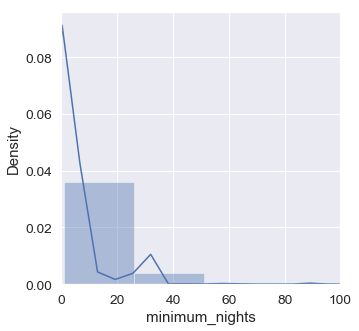

In [74]:
plt.xlim([0, 100])
sns.distplot(AirBnB['minimum_nights'])

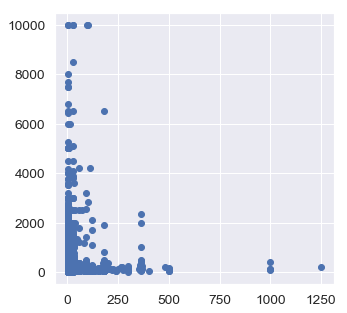

In [75]:
plt.scatter(AirBnB['minimum_nights'],AirBnB['price'])

Outliers have to be treated otherwise decision boundries will be created 

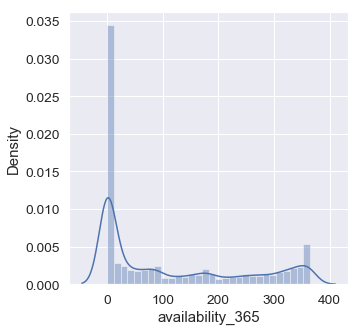

In [76]:
sns.distplot(AirBnB['availability_365'])

In [77]:
AirBnB['availability_365'].describe()

count    48895.000000
mean       112.781327
std        131.622289
min          0.000000
25%          0.000000
50%         45.000000
75%        227.000000
max        365.000000
Name: availability_365, dtype: float64

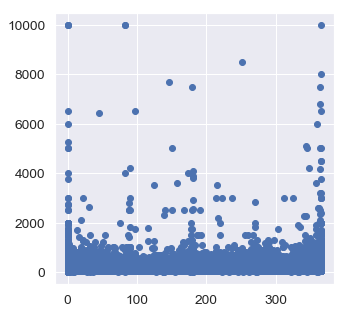

In [78]:
plt.scatter(AirBnB['availability_365'],AirBnB['price'])

In [79]:
AirBnB[AirBnB['price']>9999]

id                                             name   host_id  \
9151    7003697              Furnished room in Astoria apartment  20582832   
17692  13894339  Luxury 1 bedroom apt. -stunning Manhattan views   5143901   
29238  22436899                              1-BR Lincoln Center  72390391   

      host_name neighbourhood_group    neighbourhood  latitude  longitude  \
9151   Kathrine              Queens          Astoria  40.76810  -73.91651   
17692      Erin            Brooklyn       Greenpoint  40.73260  -73.95739   
29238    Jelena           Manhattan  Upper West Side  40.77213  -73.98665   

             room_type  price  minimum_nights  number_of_reviews last_review  \
9151      Private room  10000             100                  2  2016-02-13   
17692  Entire home/apt  10000               5                  5  2017-07-27   
29238  Entire home/apt  10000              30                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  \
9151                0.04                               1                 0   
17692               0.16                               1                 0   
29238               0.00                               1                83   

       count  
9151       1  
17692      1  
29238      1

In [80]:
AirBnB[(AirBnB['neighbourhood_group']=='Queens') & (AirBnB['neighbourhood']=='Astoria') & (AirBnB['room_type']=='Private room')]

id                                               name    host_id  \
348       94035  Modern, Safe, Clean, Bright Room in Astoria for 2      35375   
776      278145                 Large Room in a Huge NY apartment.    1452026   
1242     531091               King size bedroom in 2 bed apartment    1787284   
1329     582372                Comfy New York City Launching Pad!!     733370   
1438     645693   ☆☆New Discount☆☆ Beautiful Room / Next to Subway    3233986   
...         ...                                                ...        ...   
48615  36344079                       The Little Castle in Astoria    3867848   
48621  36346454   Queen Bed in Queens **Amazing Astoria Location**   27589350   
48682  36382381   Spacious studio in the heart of downtown Astoria  273570019   
48685  36383565    Spacious Astoria Apartment in a Prime Location!   14258377   
48797  36437317                            private room in Astoria  122204600   

      host_name neighbourhood_group neighbourhood  latitude  longitude  \
348    Savannah              Queens       Astoria  40.75961  -73.91117   
776       Heidi              Queens       Astoria  40.77117  -73.91905   
1242     Dragan              Queens       Astoria  40.75532  -73.91603   
1329        Tim              Queens       Astoria  40.77115  -73.92275   
1438     Daniel              Queens       Astoria  40.75703  -73.91666   
...         ...                 ...           ...       ...        ...   
48615    Prince              Queens       Astoria  40.76887  -73.91128   
48621      Adam              Queens       Astoria  40.76575  -73.92307   
48682    Khaled              Queens       Astoria  40.76349  -73.92577   
48685     Tracy              Queens       Astoria  40.76389  -73.91963   
48797  Mohammed              Queens       Astoria  40.76431  -73.90992   

          room_type  price  minimum_nights  number_of_reviews last_review  \
348    Private room     80               1                 42  2019-07-06   
776    Private room     30               5                  3  2017-06-20   
1242   Private room    109              30                304  2019-06-19   
1329   Private room     69              40                 23  2016-07-01   
1438   Private room     61               4                107  2019-06-22   
...             ...    ...             ...                ...         ...   
48615  Private room    150               1                  1  2019-07-04   
48621  Private room     55               1                  0         NaN   
48682  Private room     75               1                  0         NaN   
48685  Private room     50               4                  0         NaN   
48797  Private room     49              15                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  \
348                 1.21                               2               365   
776                 0.03                               1                 0   
1242                3.70                               1                 0   
1329                0.27                               1               207   
1438                1.29                               2               335   
...                  ...                             ...               ...   
48615               1.00                               1               165   
48621               0.00                               1                13   
48682               0.00                               1               359   
48685               0.00                               1                38   
48797               0.00                               1               341   

       count  
348        1  
776        1  
1242       1  
1329       1  
1438       1  
...      ...  
48615      1  
48621      1  
48682      1  
48685      1  
48797      1  

[494 rows x 17 columns]

# Random Forest Regression

In [81]:
AirBnB_MD=AirBnB[["price","number_of_reviews","neighbourhood_group","room_type","availability_365","calculated_host_listings_count","minimum_nights", 'latitude',
       'longitude']]

In [82]:
AirBnB_MD.price.describe(percentiles=[.25,.5,.75,.8,.85,.9,.95,.99])

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
80%        200.000000
85%        225.000000
90%        269.000000
95%        355.000000
99%        799.000000
max      10000.000000
Name: price, dtype: float64

In [83]:
AirBnB_MD[AirBnB_MD['price']>1000].shape

(239, 9)

In [84]:
AirBnB_MD[AirBnB_MD['price']<10].shape

(11, 9)

In [85]:
AirBnB_MD.shape

(48895, 9)

In [86]:
AirBnB_1000=AirBnB_MD[(AirBnB_MD['price']<1001) & (AirBnB_MD['price']>9 )]

**Removing extreme values as we do not have enough data to explain the high variance (only 239 observations from 1k-10k price and also the numbe of variables are less) . We now define our problem to predict the prices for AirBnB which fall in the above range.**

In [87]:
AirBnB_1000.price.min()

10

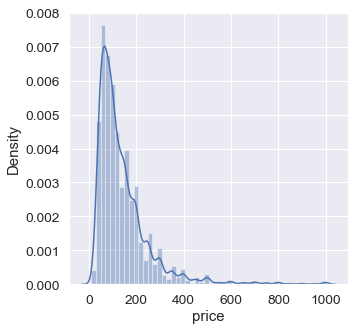

In [88]:
sns.distplot(AirBnB_1000['price'])

In [89]:
pred = AirBnB_1000[['price']]


 mean = 4.72 and std dev = 0.66



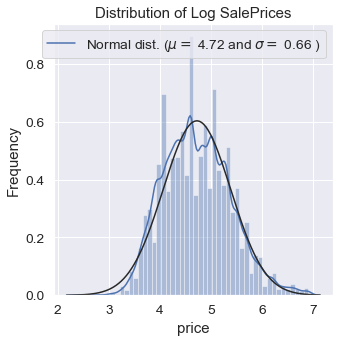

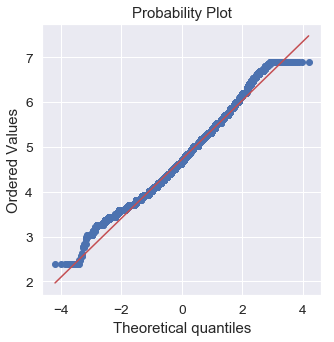

In [90]:
from scipy.stats import norm
import scipy.stats as stats
#Using the log1p function applies log(1+x) to all elements of the column
pred['price'] = np.log1p(pred['price'])

#Check the new distribution after log transformation 
sns.distplot(pred['price'], fit=norm) 

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(pred['price'])
print( '\n mean = {:.2f} and std dev = {:.2f}\n'.format(mu, sigma))

#NPlotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Distribution of Log SalePrices')

#Also the QQ plot
fig = plt.figure()
res = stats.probplot(pred['price'], plot=plt)
plt.show()

In [91]:
AirBnB_1000.price.describe(percentiles=[.25,.5,.75,.8,.85,.9,.95,.99])

count    48645.000000
mean       141.311789
std        116.731330
min         10.000000
25%         69.000000
50%        105.000000
75%        175.000000
80%        199.000000
85%        225.000000
90%        259.000000
95%        350.000000
99%        650.000000
max       1000.000000
Name: price, dtype: float64

In [92]:
AirBnB_1000[['price']].describe()

price
count  48645.000000
mean     141.311789
std      116.731330
min       10.000000
25%       69.000000
50%      105.000000
75%      175.000000
max     1000.000000

In [93]:
AirBnB_x=AirBnB_1000.iloc[:,1:]

In [94]:
AirBnB_x.columns

Index(['number_of_reviews', 'neighbourhood_group', 'room_type',
       'availability_365', 'calculated_host_listings_count', 'minimum_nights',
       'latitude', 'longitude'],
      dtype='object')

In [95]:
AirBnB_x=pd.get_dummies(AirBnB_x, columns=['neighbourhood_group','room_type'])

In [96]:
AirBnB_x=AirBnB_x.astype('float')

In [97]:
AirBnB_x.head()

number_of_reviews  availability_365  calculated_host_listings_count  \
0                9.0             365.0                             6.0   
1               45.0             355.0                             2.0   
2                0.0             365.0                             1.0   
3              270.0             194.0                             1.0   
4                9.0               0.0                             1.0   

   minimum_nights  latitude  longitude  neighbourhood_group_Bronx  \
0             1.0  40.64749  -73.97237                        0.0   
1             1.0  40.75362  -73.98377                        0.0   
2             3.0  40.80902  -73.94190                        0.0   
3             1.0  40.68514  -73.95976                        0.0   
4            10.0  40.79851  -73.94399                        0.0   

   neighbourhood_group_Brooklyn  neighbourhood_group_Manhattan  \
0                           1.0                            0.0   
1                           0.0                            1.0   
2                           0.0                            1.0   
3                           1.0                            0.0   
4                           0.0                            1.0   

   neighbourhood_group_Queens  neighbourhood_group_Staten Island  \
0                         0.0                                0.0   
1                         0.0                                0.0   
2                         0.0                                0.0   
3                         0.0                                0.0   
4                         0.0                                0.0   

   room_type_Entire home/apt  room_type_Private room  room_type_Shared room  
0                        0.0                     1.0                    0.0  
1                        1.0                     0.0                    0.0  
2                        0.0                     1.0                    0.0  
3                        1.0                     0.0                    0.0  
4                        1.0                     0.0                    0.0

In [98]:
xTrain, xTest, yTrain, yTest = train_test_split(AirBnB_x, pred, test_size = 0.2, random_state = 123)

In [99]:
AirBnB_1000.isnull().sum()

price                             0
number_of_reviews                 0
neighbourhood_group               0
room_type                         0
availability_365                  0
calculated_host_listings_count    0
minimum_nights                    0
latitude                          0
longitude                         0
dtype: int64

In [100]:
# create regressor object 
regressor_rf = RandomForestRegressor(n_estimators = 500, random_state = 123) 
  
# fit the regressor with x and y data 
regressor_rf.fit(xTrain,yTrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=123, verbose=0, warm_start=False)

In [101]:
pred_rf = regressor_rf.predict(xTest)
pred_rf_num = pd.DataFrame(np.exp(pred_rf))

yTest_num = pd.DataFrame(np.exp(yTest))

rmse = np.sqrt(mean_squared_error(yTest, pred_rf))
print("RMSE: %f" % (rmse))

rmse = np.sqrt(mean_squared_error(yTest_num, pred_rf_num))
print("RMSE: %f" % (rmse))

RMSE: 0.405121
RMSE: 86.728055


**Further removing extreme values restricting the range between 9 to 780, to improve the distribution. We now define our problem to predict the prices for AirBnB which fall in the above range.**

In [102]:
AirBnB_780=AirBnB_MD[(AirBnB_MD['price']<781) & (AirBnB_MD['price']>9 )]

In [103]:
AirBnB_780.shape

(48380, 9)

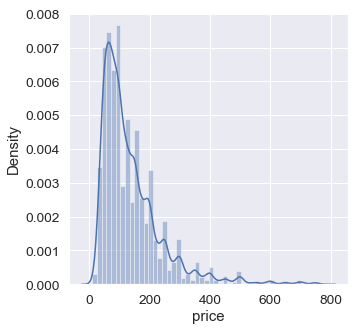

In [104]:
sns.distplot(AirBnB_780['price'])

In [105]:
pred=AirBnB_780[['price']]

In [106]:
AirBnB_780[['price']].describe()

price
count  48380.000000
mean     137.166784
std      102.507758
min       10.000000
25%       69.000000
50%      105.000000
75%      175.000000
max      780.000000


 mean = 4.71 and std dev = 0.65



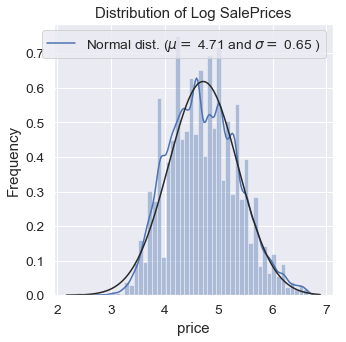

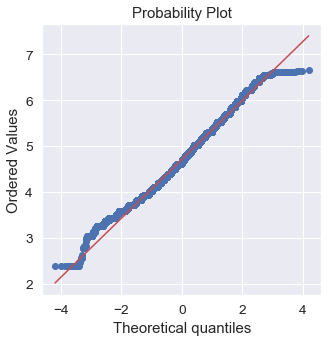

In [107]:
from scipy.stats import norm
import scipy.stats as stats
#Using the log1p function applies log(1+x) to all elements of the column
pred['price'] = np.log1p(pred['price'])

#Check the new distribution after log transformation 
sns.distplot(pred['price'], fit=norm) 

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(pred['price'])
print( '\n mean = {:.2f} and std dev = {:.2f}\n'.format(mu, sigma))

#NPlotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Distribution of Log SalePrices')

#Also the QQ plot
fig = plt.figure()
res = stats.probplot(pred['price'], plot=plt)
plt.show()

In [108]:
AirBnB_x = AirBnB_780.iloc[:,1:]

In [109]:
AirBnB_x = pd.get_dummies(AirBnB_x, columns=['neighbourhood_group','room_type'])

In [110]:
AirBnB_x = AirBnB_x.astype('float')

In [111]:
xTrain, xTest, yTrain, yTest = train_test_split(AirBnB_x, pred, test_size = 0.2, random_state = 123)

In [112]:
# create regressor object 
regressor_rf = RandomForestRegressor(n_estimators = 500, random_state = 123) 
  
# fit the regressor with x and y data 
regressor_rf.fit(xTrain,yTrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=123, verbose=0, warm_start=False)

In [113]:
pred_rf_num.describe()

0
count  9729.000000
mean    131.429932
std      75.072873
min      23.087754
25%      71.044286
50%     115.529767
75%     173.365591
max     780.918871

In [114]:
pred_rf = regressor_rf.predict(xTest)
pred_rf_num = pd.DataFrame(np.exp(pred_rf))

yTest_num = pd.DataFrame(np.exp(yTest))

rmse = np.sqrt(mean_squared_error(yTest, pred_rf))
print("RMSE: %f" % (rmse))

rmse = np.sqrt(mean_squared_error(yTest_num, pred_rf_num))
print("RMSE: %f" % (rmse))

RMSE: 0.391836
RMSE: 74.049921


## Manually looking at ranges of values for different hyperparameters

### n_estimators: the number of trees in the forest (the more the better since we are taking the mean values)

In [115]:
n_estimators = [50, 100, 200, 300, 400, 500]
test_results = []

for estimator in n_estimators:
   rf = RandomForestRegressor(n_estimators = estimator, n_jobs = -1) 
   rf.fit(xTrain, yTrain) 
    
   pred_rf_num = pd.DataFrame(np.exp(rf.predict(xTest)))
   yTest_num = pd.DataFrame(np.exp(yTest))

   rmse = np.sqrt(mean_squared_error(yTest_num, pred_rf_num))
   print(estimator)
   print("RMSE: %f" % (rmse))

   test_results.append(rmse)

50
RMSE: 74.393440
100
RMSE: 74.281278
200
RMSE: 74.201163
300
RMSE: 74.079966
400
RMSE: 74.153585
500
RMSE: 74.091754


## max_depths: the maximum depth of a tree(should be an optimum number-not too short and not too large to avoid overfitting)

In [116]:
max_depths = np.linspace(3, 10, 8, endpoint=True)

test_results = []


for max_depth in max_depths:
   rf = RandomForestRegressor(max_depth = max_depth, n_jobs = -1) 
   rf.fit(xTrain, yTrain)
     
   pred_rf_num = pd.DataFrame(np.exp(rf.predict(xTest)))
   yTest_num = pd.DataFrame(np.exp(yTest))

   rmse = np.sqrt(mean_squared_error(yTest_num, pred_rf_num))
   print(max_depth)
   print("RMSE: %f" % (rmse))

   test_results.append(rmse)

3.0
RMSE: 85.794318
4.0
RMSE: 84.174272
5.0
RMSE: 82.664372
6.0
RMSE: 80.975987
7.0
RMSE: 79.309622
8.0
RMSE: 78.009174
9.0
RMSE: 76.850826
10.0
RMSE: 76.060988


## minimum number of samples required to split (fraction of total samples required)

In [117]:
min_samples_splits = np.linspace(0.1, 0.6, 6, endpoint=True)

test_results = []
for min_samples_split in min_samples_splits:
    
   rf = RandomForestRegressor(min_samples_split = min_samples_split, n_jobs = -1) 
   rf.fit(xTrain, yTrain)
      
   pred_rf_num = pd.DataFrame(np.exp(rf.predict(xTest)))
   yTest_num = pd.DataFrame(np.exp(yTest))

   rmse = np.sqrt(mean_squared_error(yTest_num, pred_rf_num))
   print(min_samples_split)
   print("RMSE: %f" % (rmse))

   test_results.append(rmse)

0.1
RMSE: 84.945872
0.2
RMSE: 88.031539
0.30000000000000004
RMSE: 87.950140
0.4
RMSE: 91.647923
0.5
RMSE: 91.610035
0.6
RMSE: 91.610136


## minimum number of samples required to be at a leaf node (fraction of total samples required at the last node for the node to exist)

In [118]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)

test_results = []
for min_samples_leaf in min_samples_leafs:
    
   rf = RandomForestRegressor(min_samples_leaf = min_samples_leaf, n_jobs = -1) 
   rf.fit(xTrain, yTrain)
      
   pred_rf_num = pd.DataFrame(np.exp(rf.predict(xTest)))
   yTest_num = pd.DataFrame(np.exp(yTest))

   rmse = np.sqrt(mean_squared_error(yTest_num, pred_rf_num))
   print(min_samples_leaf)
   print("RMSE: %f" % (rmse))

   test_results.append(rmse)

0.1
RMSE: 88.026693
0.2
RMSE: 91.611977
0.30000000000000004
RMSE: 91.592509
0.4
RMSE: 108.328321
0.5
RMSE: 108.274803


## the number of features to consider when looking for a split- default is all features

In [119]:
max_features = list(range(1,AirBnB_780.shape[1]))

test_results = []
for max_feature in max_features:
    
   rf = RandomForestRegressor(max_features = max_feature) 
   rf.fit(xTrain, yTrain)
      
   pred_rf_num = pd.DataFrame(np.exp(rf.predict(xTest)))
   yTest_num = pd.DataFrame(np.exp(yTest))

   rmse = np.sqrt(mean_squared_error(yTest_num, pred_rf_num))
   print(max_feature)
   print("RMSE: %f" % (rmse))

   test_results.append(rmse)

1
RMSE: 76.713074
2
RMSE: 76.288397
3
RMSE: 76.993239
4
RMSE: 76.428896
5
RMSE: 76.432488
6
RMSE: 76.546224
7
RMSE: 76.053072
8
RMSE: 76.207542


In [ ]:
# Perform Grid-Search

param_grid={
   'max_depth': range(3,8),
   'n_estimators': ( 50, 100, 200, 400, 500),
   'min_samples_split': np.linspace(0.3, 0.6, 4, endpoint=True),
   'min_samples_leaf' : np.linspace(0.1, 0.3, 3, endpoint=True),
   'max_features' : list(range(1, AirBnB_780.shape[1]))
            }

# Create a based model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(xTrain, yTrain)
print(grid_search.best_params_)

Fitting 3 folds for each of 2400 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   54.0s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 19.2min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 24.1min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed: 29.0min
[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed: 35.3min
[Parallel(n_jobs=-1)]: Done 6829 tasks      | elapsed: 41.2min


In [ ]:
best_grid = grid_search.best_estimator_

In [ ]:
# create regressor object 
#grid_regressor_rf = RandomForestRegressor(max_depth= 7, max_features= 8, min_samples_leaf= 0.1, min_samples_split= 0.3, 
 #                                    n_estimators= 50) 
  
# fit the regressor with x and y data 
#grid_regressor_rf.fit(xTrain,yTrain)  

pred_rf = grid_search.predict(xTest)
pred_rf_num = pd.DataFrame(np.exp(pred_rf))

yTest_num = pd.DataFrame(np.exp(yTest))

rmse = np.sqrt(mean_squared_error(yTest, pred_rf))
print("RMSE: %f" % (rmse))

rmse = np.sqrt(mean_squared_error(yTest_num, pred_rf_num))
print("RMSE: %f" % (rmse))

**Since, the RMSE after hyper parameter tuning is less than the default we will go with the default one.**